In [1]:
import numpy as np
import torch

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
def plot_output_space(ax, algo, metric, seed, title):
    output_path = f"data/vehicle/{str(seed).zfill(4)}_{algo}_{metric}.pt"
    data = torch.load(output_path)
    X = data["X"]
    Y = data["Y"]

    n0 = num_initial_points
    n = num_iterations
    colors = pl.cm.viridis(np.linspace(0, 1, n))

    ax.scatter(Y[:n0, 0], Y[:n0, 1], Y[:n0, 2], color="k", depthshade=True, s=40)
    ax.scatter(
        Y[n0 : n0 + n, 0],
        Y[n0 : n0 + n, 1],
        Y[n0 : n0 + n, 2],
        c=colors,
        depthshade=True,
        s=40,
    )

    ax.set_xlabel(r"$y^{(1)}$", fontsize=15)
    ax.set_ylabel(r"$y^{(2)}$", fontsize=15)
    ax.set_zlabel(r"$y^{(3)}$", fontsize=15)

    ax.set_xlim(-1705.0, -1650.0)
    ax.set_ylim(-11.7, -6.1)
    ax.set_zlim(-0.26, -0.04)
    ax.set_title(title, fontsize=30, y=1)
    ax.view_init(30, 60)

    ax.set_box_aspect(aspect=None, zoom=1.0)
    # ax.tick_params(axis="both", which="major", labelsize=8)
    # Get rid of colored axes planes
    # First remove fill
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor("w")
    ax.yaxis.pane.set_edgecolor("w")
    ax.zaxis.pane.set_edgecolor("w")

    return None

In [3]:
dim = 5
num_initial_points = 2 * (dim + 1)
num_iterations = 100
seed = 1

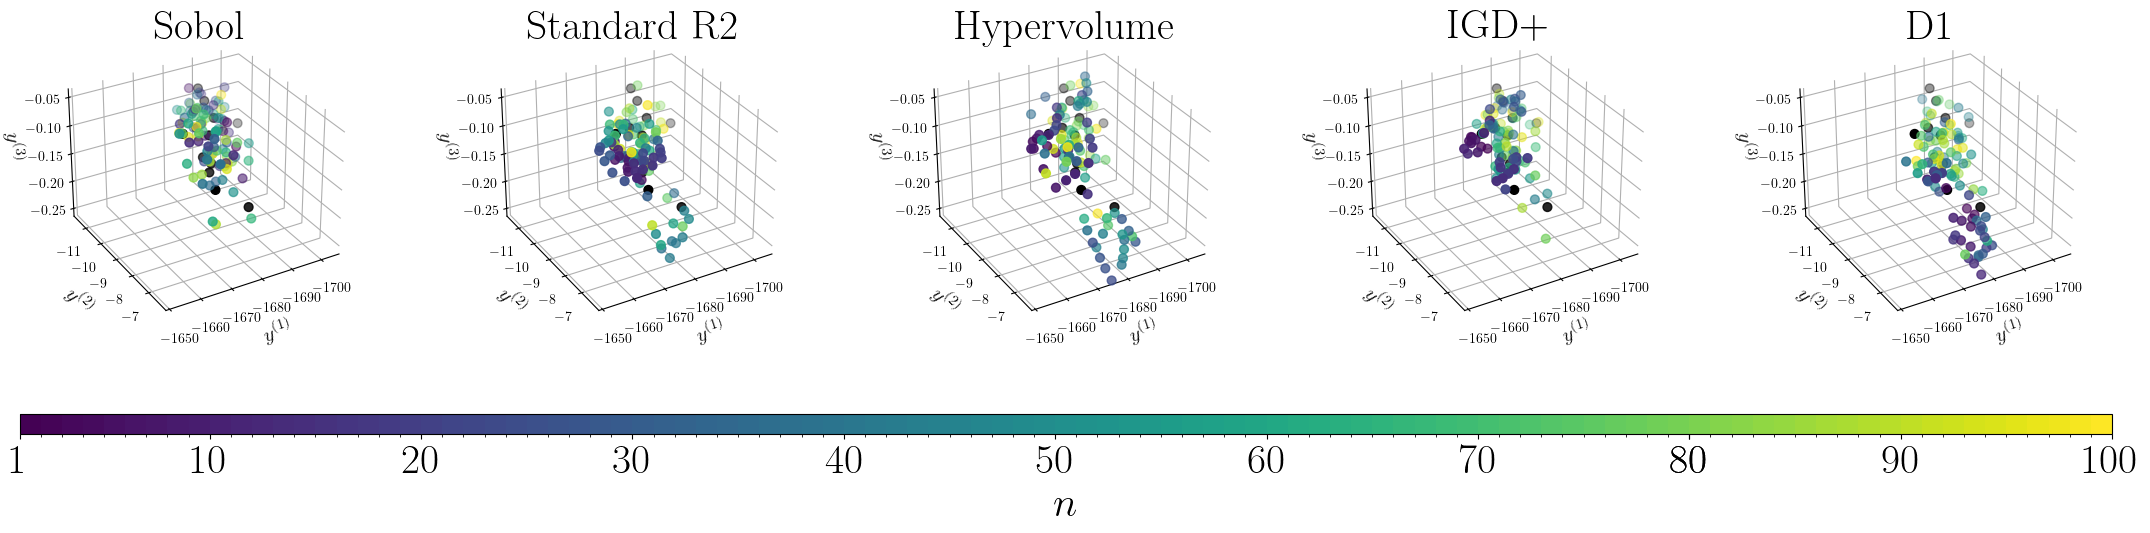

In [4]:
fig, axes = plt.subplots(1, 5, subplot_kw={"projection": "3d"}, figsize=(27, 4))

# sobol
ax = plt.subplot(1, 5, 1)
plot_output_space(ax=ax, algo="sobol", metric="hv", title="Sobol", seed=seed)

# hv
ax = plt.subplot(1, 5, 3)
plot_output_space(ax=ax, algo="eui", metric="hv", title="Hypervolume", seed=seed)

# igd
ax = plt.subplot(1, 5, 4)
plot_output_space(ax=ax, algo="eui", metric="igd", title="IGD+", seed=seed)

# d1
ax = plt.subplot(1, 5, 5)
plot_output_space(ax=ax, algo="eui", metric="d1", title=r"D1", seed=seed)

# r2
ax = plt.subplot(1, 5, 2)
plot_output_space(ax=ax, algo="eui", metric="r2", title=r"Standard R2", seed=seed)


cmap = plt.cm.viridis
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "custom_cmap", cmaplist, cmap.N
)
bounds = np.linspace(1, 100, 100)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
ax_bar = fig.add_axes([0.125, -0.15, 0.775, 0.05])
cbar = matplotlib.colorbar.ColorbarBase(
    ax_bar,
    cmap=cmap,
    norm=norm,
    spacing="proportional",
    ticks=bounds + 0.5,
    boundaries=bounds,
    format="%1i",
    orientation="horizontal",
)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 80, 90, 100], fontsize=30)
plt.xlabel(r"$n$", fontsize=30)
plt.show()